In [883]:
# importing important libraries
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import xticks

# To Scale our data
from sklearn.preprocessing import MinMaxScaler

# To perform train-test splitting
from sklearn.model_selection import train_test_split

# To perofrm Regression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as skl
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

import os

# For warnings
import warnings
warnings.filterwarnings('ignore')

In [884]:
# read the file
df = pd.read_csv(r"H:\UpGrad\Machine Learning 2\Assignment Advanced Regression\train.csv")
# diplaying first few rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [885]:
# Displaying the shape of the dataset
df.shape

(1460, 81)

In [886]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [887]:
# Descibe the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

 Missing value treatment

In [888]:
#Remove the columns which has only one unique value.
df= df.loc[:,df.nunique()!=1]
df.shape

(1460, 81)

In [889]:
# Checking the precentage of the null value in each column and sorting them in descending order
round((df.isnull().sum()/len(df.index)*100),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [890]:
# Dropping the columns having more the 10% missing values
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>10.00)],axis =1)

In [891]:
# Checking the precentage of the null value in each row and sorting them in descending order
round((df.isnull().sum(axis = 1)/len(df.columns)*100),2).sort_values(ascending = False)

1218    13.33
705     13.33
1179    13.33
533     13.33
1011    13.33
520     13.33
39      13.33
1323     6.67
1325     6.67
125      6.67
1326     6.67
108      6.67
291      6.67
1321     6.67
1143     6.67
968      6.67
127      6.67
1137     6.67
970      6.67
1337     6.67
1131     6.67
441      6.67
976      6.67
960      6.67
778      6.67
434      6.67
620      6.67
88       6.67
89       6.67
90       6.67
        ...  
971      0.00
972      0.00
974      0.00
975      0.00
978      0.00
979      0.00
980      0.00
981      0.00
957      0.00
956      0.00
955      0.00
953      0.00
933      0.00
934      0.00
935      0.00
937      0.00
938      0.00
939      0.00
940      0.00
941      0.00
943      0.00
944      0.00
945      0.00
946      0.00
947      0.00
949      0.00
950      0.00
951      0.00
952      0.00
0        0.00
Length: 1460, dtype: float64

In [892]:
# Dropping the rows having more the 10% missing values
df = df[(round(100*(df.isnull().sum(axis = 1)/len(df.columns)), 2)<10.00)]

In [893]:
# Checking the precentage of the null value in each row and sorting them in descending order
round((df.isnull().sum(axis = 1)/len(df.columns)*100),2).sort_values(ascending = False)

1048    6.67
291     6.67
1337    6.67
163     6.67
968     6.67
1143    6.67
635     6.67
636     6.67
562     6.67
638     6.67
182     6.67
921     6.67
1000    6.67
241     6.67
1009    6.67
868     6.67
843     6.67
646     6.67
287     6.67
1257    6.67
649     6.67
1049    6.67
1326    6.67
1096    6.67
750     6.67
1131    6.67
970     6.67
250     6.67
78      6.67
431     6.67
        ... 
972     0.00
974     0.00
975     0.00
978     0.00
979     0.00
980     0.00
981     0.00
982     0.00
958     0.00
957     0.00
956     0.00
955     0.00
934     0.00
935     0.00
937     0.00
938     0.00
939     0.00
940     0.00
941     0.00
943     0.00
944     0.00
945     0.00
946     0.00
947     0.00
949     0.00
950     0.00
951     0.00
952     0.00
953     0.00
0       0.00
Length: 1453, dtype: float64

In [894]:
# Checking the precentage of the null value in each column and sorting them in descending order
round((df.isnull().sum()/len(df.index)*100),2).sort_values(ascending = False)

GarageType       5.09
GarageYrBlt      5.09
GarageFinish     5.09
GarageCond       5.09
GarageQual       5.09
BsmtExposure     2.13
BsmtFinType2     2.13
BsmtFinType1     2.06
BsmtCond         2.06
BsmtQual         2.06
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
HouseStyle       0.00
OverallCond      0.00
OverallQual      0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
                 ... 
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
3SsnPorch        0.00
BsmtUnfSF        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQua

In [895]:
# Describing the column 'GarageType'
df['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

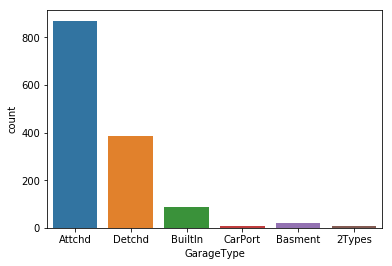

In [896]:
# Plotting the column 'GarageType'
sns.countplot(df['GarageType'])

- Here we could see that the column 'GarageType' has maximum frequency of the category 'Attchd' i.e of attached garage.
- Here we will create a new category by the name of 'OtherGarageTypes' to impute the missing value.

In [897]:
# Imputing the null value into a new category
df['GarageType'] = df['GarageType'].replace(np.nan,'OtherGarageTypes')

In [898]:
# Descibing the column 'GarageYrBlt'
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text xticklabel objects>)

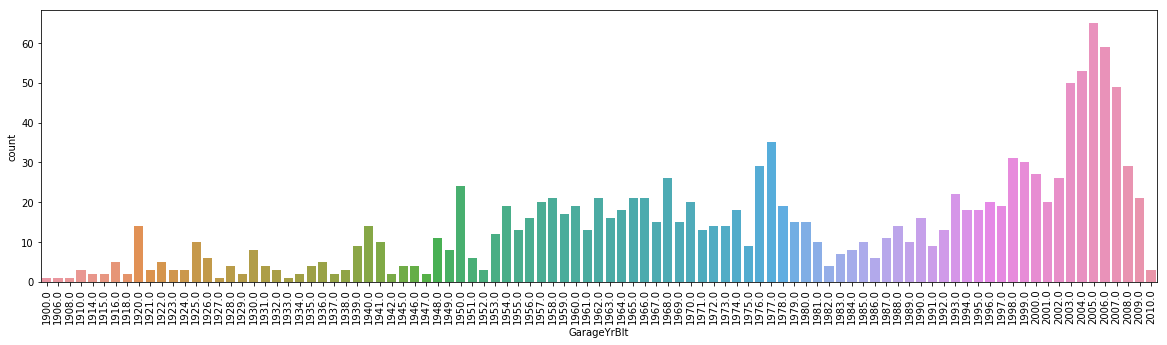

In [899]:
# Plotting the column 'GarageYrBlt'
plt.figure(figsize = (20,5))
sns.countplot(df['GarageYrBlt'])
xticks(rotation = 90)

- The above attribute is categorical but it has too many categories, so we will buckett/bin them into feasible number of categories. 

In [900]:
#Binning the column 'GarageYrBlt'
bins = [1900, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
df['Garage_Yr_Blt'] = pd.cut(df['GarageYrBlt'], bins)

In [901]:
# Dropping the column 'GarageYrBlt'
df.drop('GarageYrBlt',axis = 1,inplace = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

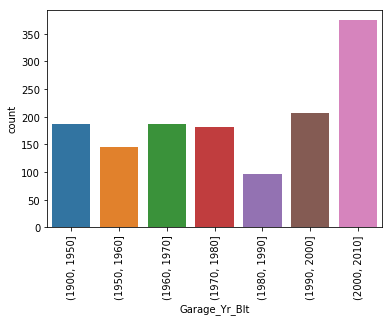

In [902]:
# Plotting the column 'Garage_Yr_Blt'
sns.countplot(df['Garage_Yr_Blt'])
xticks(rotation = 90)

- In this column we will impute the missing value in the category '(2000,2010)'

In [903]:
# Imputing the missing value with the category '(2000,2010)'
df['Garage_Yr_Blt'] = df['Garage_Yr_Blt'].replace(np.nan,'(2000,2010)')

In [904]:
# Describing the column 'GarageFinish'
df['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

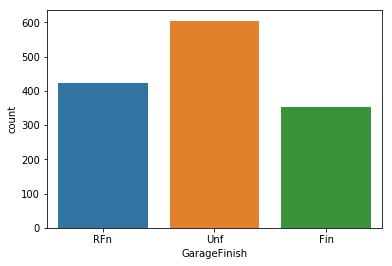

In [905]:
# Plotting the column 'GarageFinish'
sns.countplot(df['GarageFinish'])

- Here we will impute the null value in most frequent category 'Unf'.

In [906]:
# Imputing the null value by the category 'Unf'
df['GarageFinish'] = df['GarageFinish'].replace(np.nan,'Unf')

In [907]:
# Decribing the column 'GarageCond'
df['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

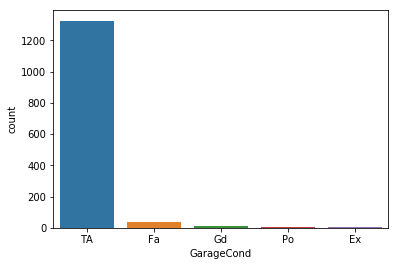

In [908]:
# Plotting the column 'GarageCond'
sns.countplot(df['GarageCond'])

- Here we will replace the null value with the most frequent category 'TA'.

In [909]:
# Imputting the null value with the category 'TA'
df['GarageCond'] = df['GarageCond'].replace(np.nan,'TA')

In [910]:
# Describing the column 'GarageQual'
df['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

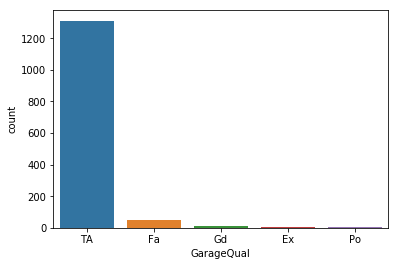

In [911]:
# plotting the column 'GarageQual'
sns.countplot(df['GarageQual'])

- Here we will replace the null value with the most frequent category 'TA'.

In [912]:
# Imputing the null value with the category 'TA'
df['GarageQual'] = df['GarageQual'].replace(np.nan,'TA')

In [913]:
# Describing the column 'BsmtExposure'
df['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

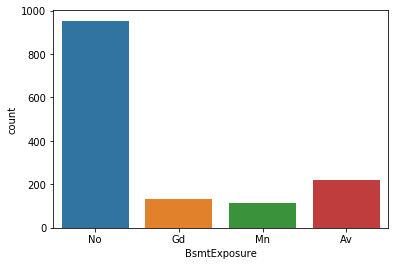

In [914]:
# Plotting the column 'BsmtExposure'
sns.countplot(df['BsmtExposure'])

- In this column we will replace the null value with the most frequent category 'No'.

In [915]:
# Imputting the null value with the category 'No'
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan,'No')

In [916]:
# Describing the column 'BsmtFinType2'
df['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

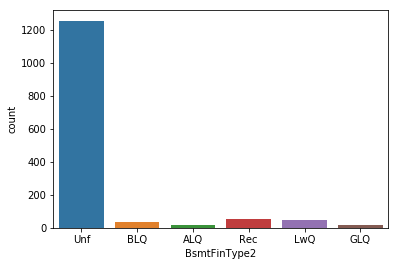

In [917]:
# Plotting the column 'BsmtFinType2'
sns.countplot(df['BsmtFinType2'])

- In this column we will replace the null value with the most frequent column 'Unf'.

In [918]:
# Imputting the missing value with the category 'Unf'
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan,'Unf')

In [919]:
# Describing the column 'BsmtFinType1'
df['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

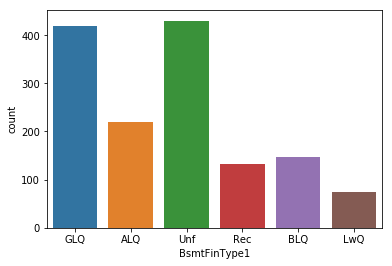

In [920]:
# Plotting the column 'BsmtFinType1'
sns.countplot(df['BsmtFinType1'])

- In this column we wil impute the null value into a new category 'Other_BsmtFinType1'.

In [921]:
# Imputting the null value into the category 'Other'
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan,'Other_BsmtFinType1')

In [922]:
# Describe the column 'BsmtCond'
df['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

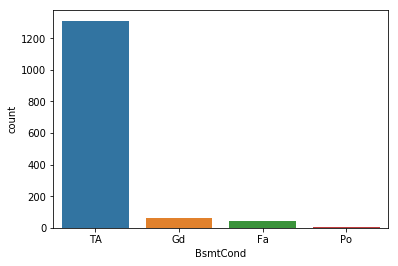

In [923]:
# Plotting the column 'BsmtCond'
sns.countplot(df['BsmtCond'])

- In this column we will replace the null value by the most frequent category 'TA'.

In [924]:
# Imputting the null value by the category 'TA'
df['BsmtCond'] = df['BsmtCond'].replace(np.nan,'TA')

In [925]:
# Describing the column 'BsmtQual'
df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

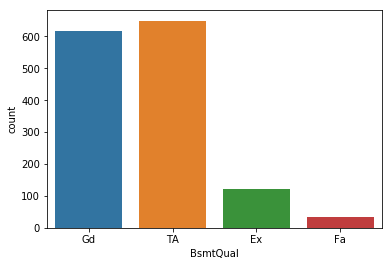

In [926]:
# Plotting the column 'BsmtQual'
sns.countplot(df['BsmtQual'])

- In this column we will impute the missing value into another new category 'Other_BsmtQual'.

In [927]:
# Imputting the null value by the category 'Other_BsmtQual'
df['BsmtQual'] = df['BsmtQual'].replace(np.nan,'Other_BsmtQual')

In [928]:
# Describe the column 'MasVnrType'
df['MasVnrType'].describe()

count     1445
unique       4
top       None
freq       857
Name: MasVnrType, dtype: object

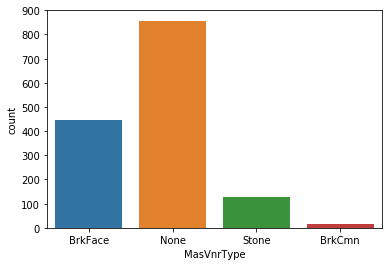

In [929]:
# Plotting the column 'MasVnrType'
sns.countplot(df['MasVnrType'])

- In this column we will impute the null values with the category 'None'

In [930]:
# Imputting the missing value with the category 'None'
df['MasVnrType'] = df['MasVnrType'].replace(np.nan,'None')

In [931]:
# Describe the column 'MasVnrArea'
df['MasVnrArea'].describe()

count    1445.000000
mean      104.187543
std       181.360231
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

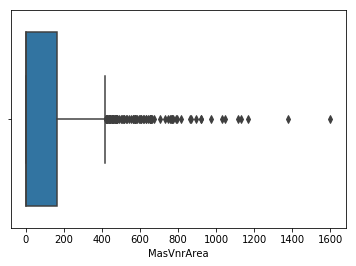

In [932]:
# PLotting the column 'MasVnrArea'
sns.boxplot(df['MasVnrArea'])

- Here we could see that this column has a lot of outliers, so we will impute the missing value with median.

In [933]:
# imputting the missing value by the median.
median = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan,median)

In [934]:
# Describe the column 'Electrical'
df['Electrical'].describe()

count      1452
unique        5
top       SBrkr
freq       1330
Name: Electrical, dtype: object

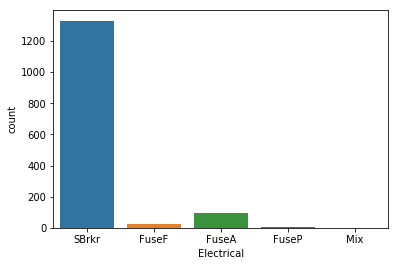

In [935]:
# plotting the column 'Electrical'
sns.countplot(df['Electrical'])

- In this column we will replace the missing value with the most frequent category 'SBrkr'.

In [936]:
# Imputing the missing value with the category 'SBrkr'
df['Electrical'] = df['Electrical'].replace(np.nan,'SBrkr')

EDA 

In [937]:
#before starting the analysis, lets have a look on the shape of df
df.shape

(1453, 75)

In [938]:
# Dropping Id as it doesn't contribute towards analysis 
df = df.drop(['Id'], axis=1)

skew is 1.8950128820284293


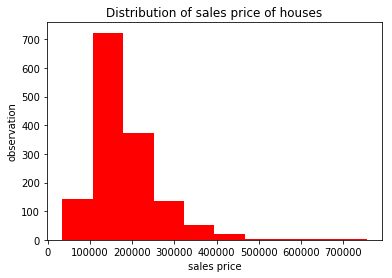

In [939]:
#analysing the distribution of dependent varaible 'SalesPrice'  
print('skew is', df.SalePrice.skew()) 
plt.hist(df['SalePrice'], color= 'r')
plt.title('Distribution of sales price of houses')
plt.ylabel('observation')
plt.xlabel('sales price')
plt.show()

In [940]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(df.SalePrice)

skew is 0.15793249905590065


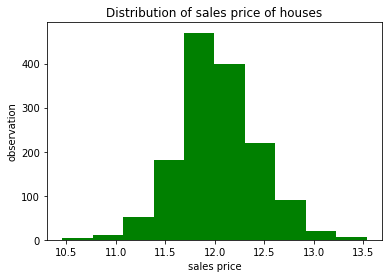

In [941]:
#analysing the distribution of sales price
print('skew is', target.skew())
plt.hist(target, color= 'g')
plt.title('Distribution of sales price of houses')
plt.ylabel('observation')
plt.xlabel('sales price')
plt.show()

In [942]:
# Pair wise relationship between various feature
# to achieve this 1st divide the numeric and categorical coulmns 
# numeric df
num_df= df._get_numeric_data()
print(len(num_df.columns))

35


In [943]:
#categorical df
categorical=[i for i in df.columns if df.dtypes[i]=='object']
categorical_df= df[categorical]
print(len(categorical_df.columns))

39


<Figure size 1440x720 with 0 Axes>

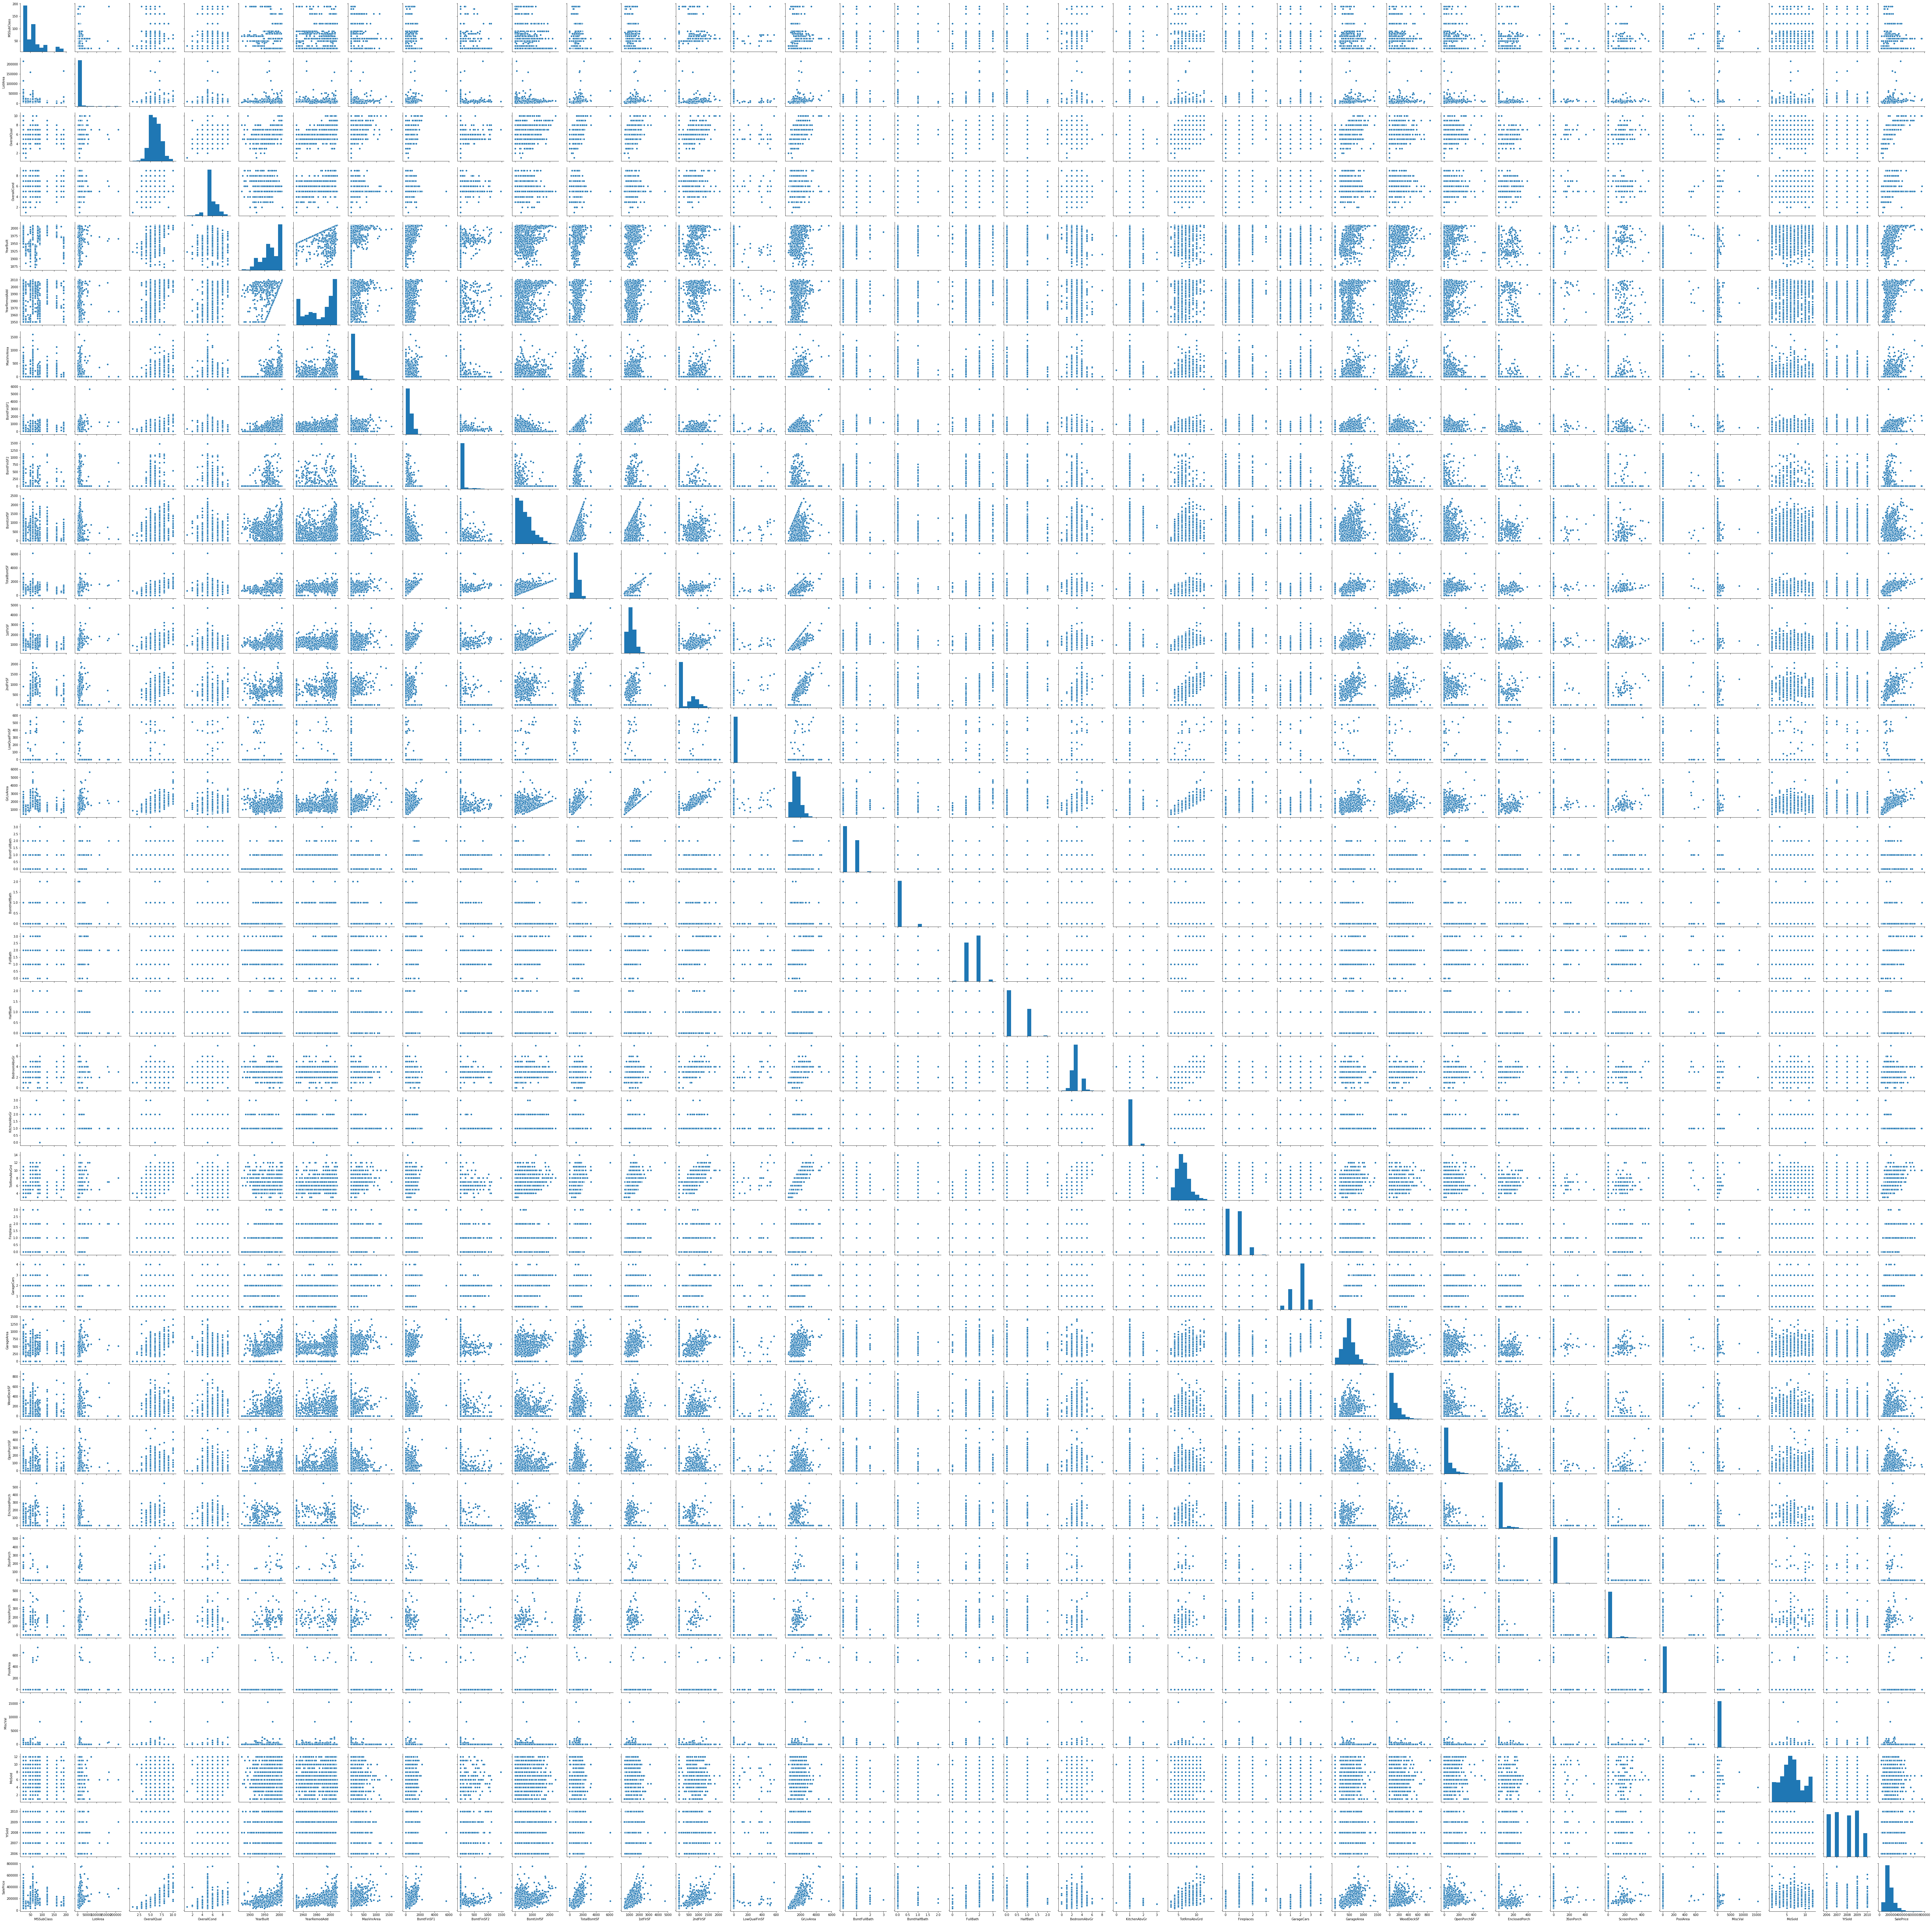

In [944]:
# Ploting each numerical variable with one another
plt.figure(figsize=(20,10))      
sns.pairplot(num_df)
plt.show()

In [945]:
# correlation matrix
cor = num_df.corr()
cor

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.140142     0.038211    -0.062814   0.035767   
LotArea         -0.140142  1.000000     0.103743    -0.007152   0.013038   
OverallQual      0.038211  0.103743     1.000000    -0.099758   0.571065   
OverallCond     -0.062814 -0.007152    -0.099758     1.000000  -0.378799   
YearBuilt        0.035767  0.013038     0.571065    -0.378799   1.000000   
YearRemodAdd     0.042403  0.011406     0.548021     0.068358   0.594138   
MasVnrArea       0.026135  0.102578     0.406489    -0.127581   0.310225   
BsmtFinSF1      -0.066517  0.213200     0.234545    -0.048907   0.246387   
BsmtFinSF2      -0.064984  0.110796    -0.061901     0.039631  -0.050610   
BsmtUnfSF       -0.137106 -0.004567     0.301827    -0.141004   0.144172   
TotalBsmtSF     -0.233728  0.260979     0.530808    -0.180155   0.387056   
1stFlrSF        -0.249982  0.299151     0.472809    -0.148423   0.278499   
2ndFlrSF         0.307446  0.050567     0.295845     0.026650   0.010779   
LowQualFinSF     0.047336  0.004600    -0.031633     0.025268  -0.184945   
GrLivArea        0.076631  0.262185     0.590437    -0.084477   0.196325   
BsmtFullBath     0.006915  0.157231     0.105740    -0.057241   0.184724   
BsmtHalfBath    -0.001356  0.047706    -0.042392     0.117573  -0.039405   
FullBath         0.127249  0.126005     0.554958    -0.197303   0.471580   
HalfBath         0.182144  0.013138     0.270128    -0.062935   0.240267   
BedroomAbvGr    -0.025988  0.118752     0.095966     0.009114  -0.072741   
KitchenAbvGr     0.267090 -0.015436    -0.174780    -0.089234  -0.166686   
TotRmsAbvGrd     0.036800  0.189222     0.424032    -0.063538   0.093961   
Fireplaces      -0.041150  0.270800     0.394243    -0.025763   0.144710   
GarageCars      -0.031079  0.153451     0.595147    -0.194846   0.535957   
GarageArea      -0.091392  0.179266     0.555896    -0.159377   0.475947   
WoodDeckSF      -0.013413  0.170852     0.237210    -0.006775   0.225335   
OpenPorchSF     -0.006666  0.083896     0.308348    -0.035803   0.189291   
EnclosedPorch   -0.016360 -0.018593    -0.113063     0.068167  -0.385716   
3SsnPorch       -0.043689  0.020256     0.029710     0.025287   0.030921   
ScreenPorch     -0.025123  0.042777     0.063313     0.054302  -0.051785   
PoolArea         0.008631  0.077596     0.065172    -0.002162   0.004649   
MiscVal         -0.023124  0.041028    -0.025347     0.072492  -0.028732   
MoSold          -0.016957  0.000416     0.066816    -0.007559   0.012252   
YrSold          -0.027855 -0.014479    -0.028499     0.043366  -0.013295   
SalePrice       -0.080423  0.262849     0.789839    -0.082656   0.520948   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
MSSubClass         0.042403    0.026135   -0.066517   -0.064984  -0.137106   
LotArea            0.011406    0.102578    0.213200    0.110796  -0.004567   
OverallQual        0.548021    0.406489    0.234545   -0.061901   0.301827   
OverallCond        0.068358   -0.127581   -0.048907    0.039631  -0.141004   
YearBuilt          0.594138    0.310225    0.246387   -0.050610   0.144172   
YearRemodAdd       1.000000    0.174290    0.123826   -0.069754   0.175413   
MasVnrArea         0.174290    1.000000    0.259376   -0.072194   0.110859   
BsmtFinSF1         0.123826    0.259376    1.000000   -0.051599  -0.504426   
BsmtFinSF2        -0.069754   -0.072194   -0.051599    1.000000  -0.211966   
BsmtUnfSF          0.175413    0.110859   -0.504426   -0.211966   1.000000   
TotalBsmtSF        0.282758    0.358775    0.519591    0.102929   0.407794   
1stFlrSF           0.237653    0.339537    0.445265    0.096493   0.315848   
2ndFlrSF           0.138239    0.173371   -0.138903   -0.099801   0.002723   
LowQualFinSF      -0.063417   -0.069015   -0.065217    0.014643   0.027533   
GrLivArea          0.283661    0.387193    0.205356   -0.010821   0.236766   
BsmtFullBath       0.115578   

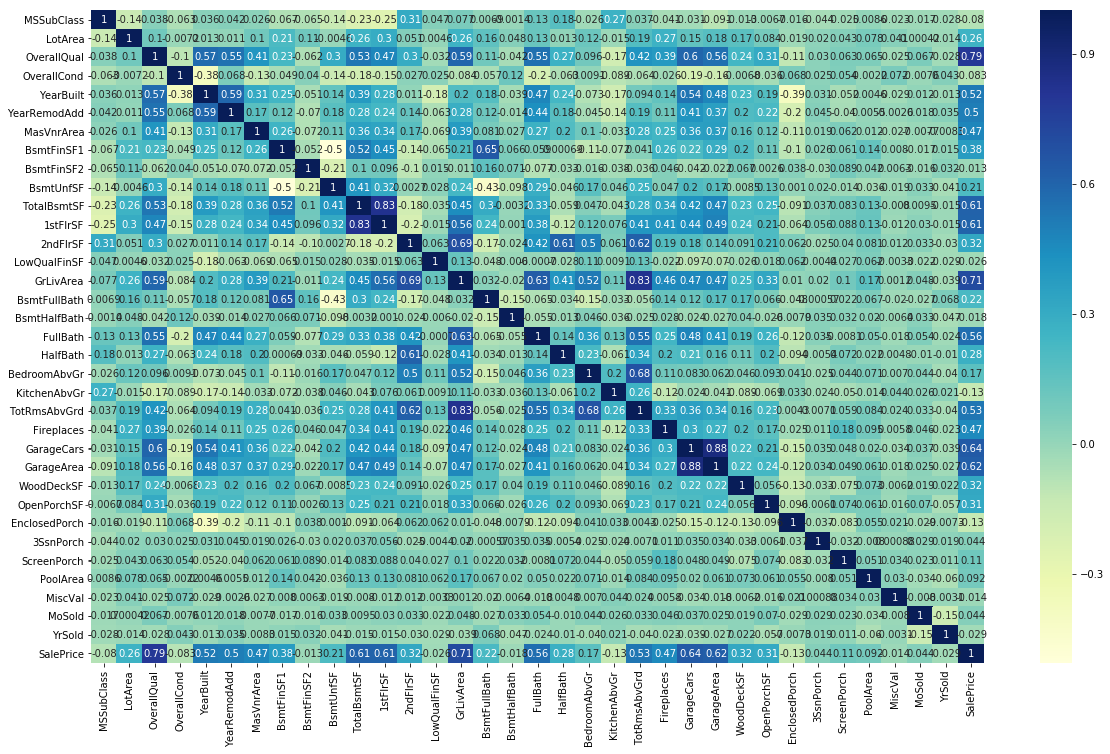

In [946]:
# Visulizating corrections on a heatma
plt.figure(figsize=(20,12))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The Heatmap clearly shows that attributes like OverQual, GrLivArea, GarageCars, GarageArea, FullBath and few other variables clearly have a strong correlation with our dependant variable SalePrice.

In [947]:
# looking on uniuqe values for the categorial columns 
categorical_df.nunique().sort_values(ascending =True)

Street            2
Utilities         2
CentralAir        2
GarageFinish      3
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
BsmtCond          4
ExterQual         4
BsmtExposure      4
KitchenQual       4
MasVnrType        4
BsmtQual          5
ExterCond         5
MSZoning          5
Electrical        5
BldgType          5
GarageQual        5
GarageCond        5
LotConfig         5
HeatingQC         5
Heating           6
BsmtFinType2      6
Foundation        6
SaleCondition     6
RoofStyle         6
Functional        7
GarageType        7
BsmtFinType1      7
RoofMatl          8
HouseStyle        8
Condition2        8
Garage_Yr_Blt     8
Condition1        9
SaleType          9
Exterior1st      14
Exterior2nd      16
Neighborhood     25
dtype: int64

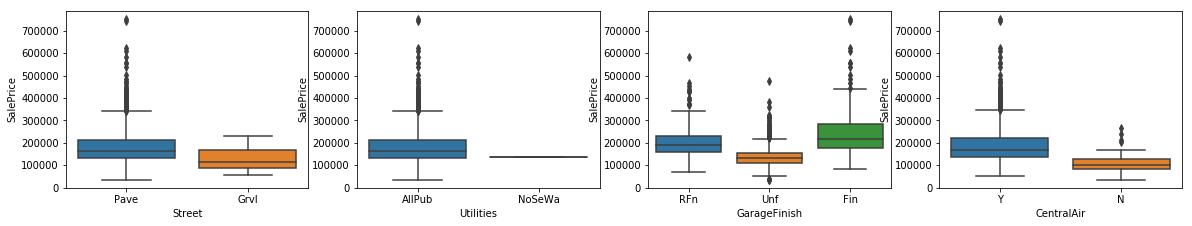

In [948]:
# Plotting the variables Street, Utilities, GarageFinish and  CentralAir with dependent variable
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df)
plt.subplot(4,4,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df)
plt.subplot(4,4,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(4,4,4)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df)

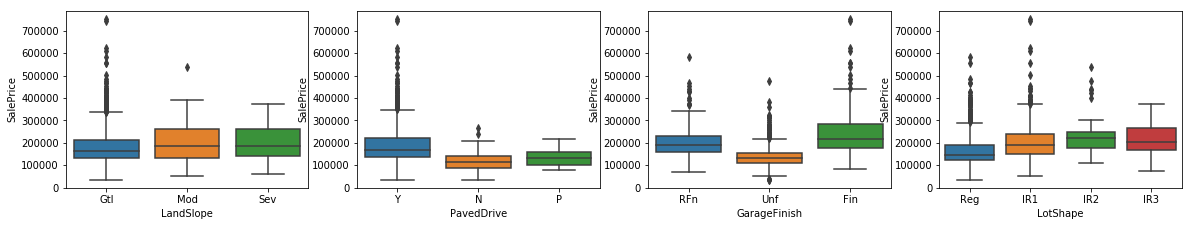

In [949]:
#Plotting the variables LandSlope, PavedDrive, GarageFinish and  PavedDrive with dependent variable
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df)
plt.subplot(4,4,2)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = df)
plt.subplot(4,4,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(4,4,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)

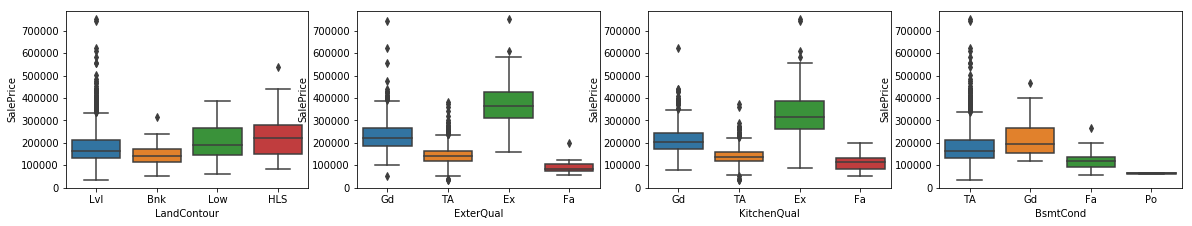

In [950]:
# Plotting the variables LandContour, ExterQual, KitchenQual and  BsmtCond with  dependent variable
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.subplot(4,4,2)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df)
plt.subplot(4,4,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)
plt.subplot(4,4,4)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df)

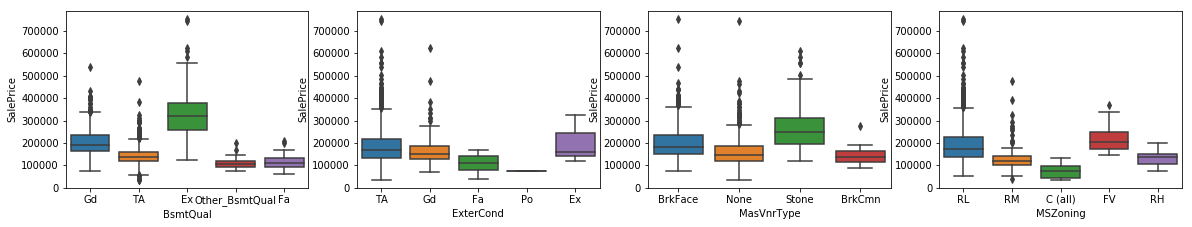

In [951]:
#Plotting the variables BsmtQual, ExterCond, MasVnrType and MSZoning with dependent variable
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(4,4,2)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df)
plt.subplot(4,4,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df)
plt.subplot(4,4,4)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

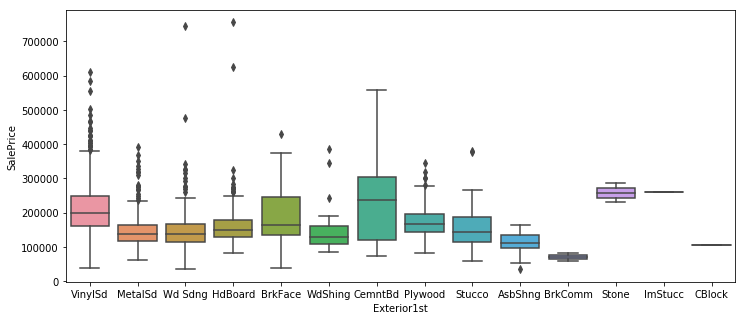

In [952]:
#Plotting the variable Exterior1st with dependent variable
plt.figure(figsize=(12,5))
plt.subplot(1,1,1)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df)

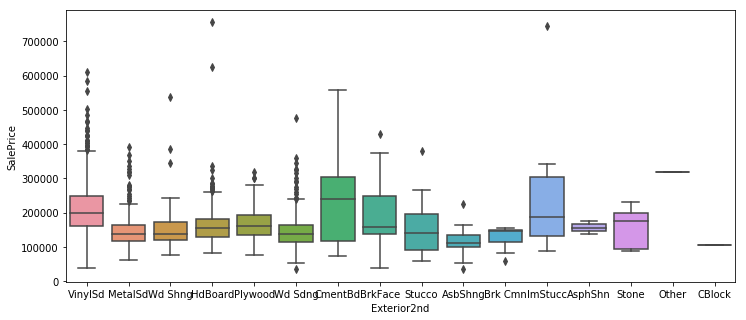

In [953]:
#Plotting the variable Exterior2nd with dependent variable
plt.figure(figsize=(12,5))
plt.subplot(1,1,1)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df)

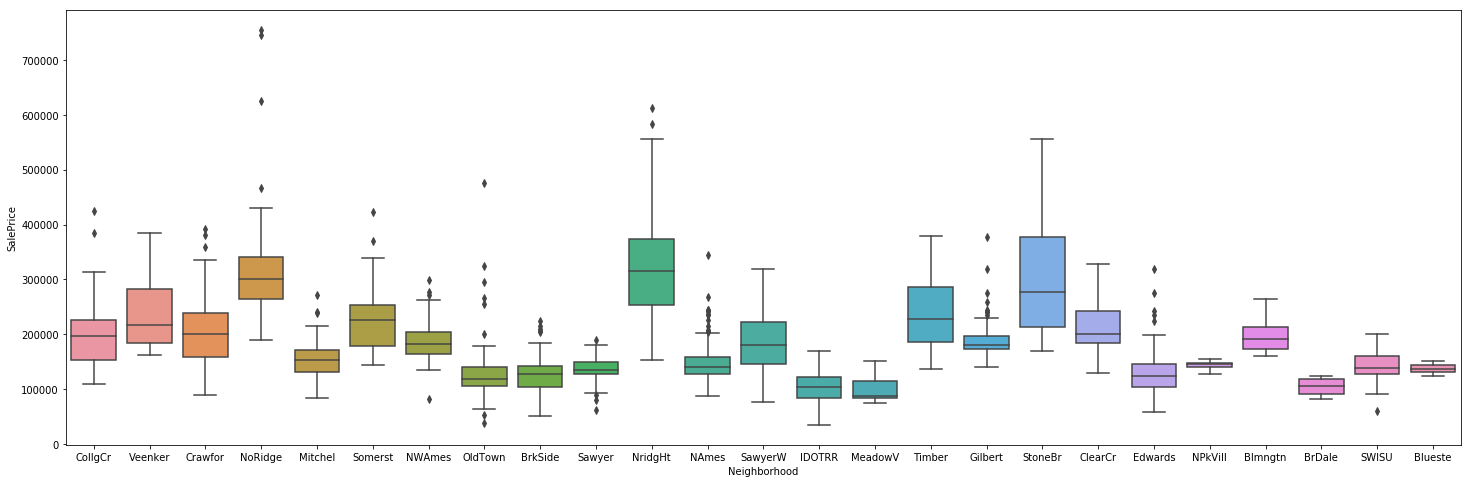

In [954]:
#Plotting the variable Neighborhood with dependent variable
plt.figure(figsize=(25,8))
plt.subplot(1,1,1)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)

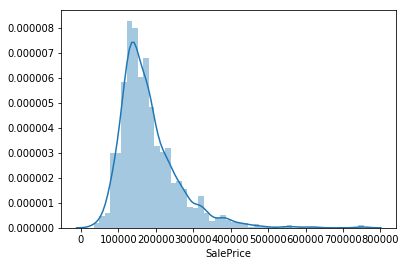

In [955]:
#let us have a look on target variable: SalePrice and its distribution 
sns.distplot(df['SalePrice'])
plt.show()

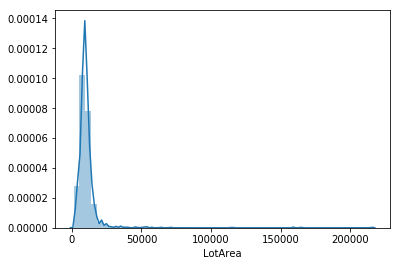

In [956]:
# let us have a look on predictor variable: LotArea (Lot size in square feet) and its distribution 
sns.distplot(df['LotArea'])
plt.show()

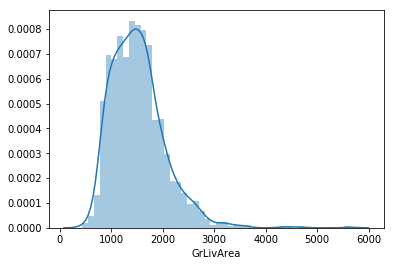

In [957]:
# let us have a look on predictor variable: GrLivArea(Above grade (ground) living area square feet) and its distribution
sns.distplot(df['GrLivArea'])
plt.show()

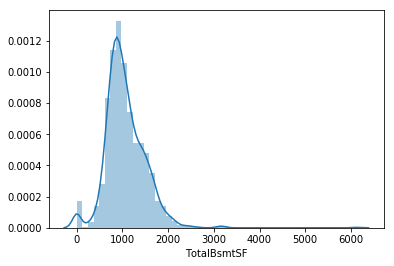

In [958]:
# let us have a look on predictor variable: TotalBsmtSF (Total square feet of basement area) and its distribution
sns.distplot(df['TotalBsmtSF'])
plt.show()

##  Modeling 

In [959]:
# Dummy creation 
housing_dummies = pd.get_dummies(categorical_df, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

             ...              SaleCondition_Family  SaleCondition_Normal  \
0            ...                                 0                     1   
1            ...                                 0                     1   
2            ...                                 0                     1   
3            ...                                 0                     0   
4            ...                                 0                     1   

   SaleCondition_Partial  Garage_Yr_Blt_(1950, 1960]  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Garage_Yr_Blt_(1960, 1970]  Garage_Yr_Blt_(1970, 1980]  \
0                           0                           0   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Garage_Yr_Blt_(1980, 1990]  Garage_Yr_Blt_(1990, 2000]  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           1   
4                           0                           1   

   Garage_Yr_Blt_(2000, 2010]  Garage_Yr_Blt_(2000,2010)  
0                           1                          0  
1                           0                          0  
2                           1                          0  
3                           0                          0  
4                           0                          0  

[5 rows x 205 columns]

In [960]:
#Now concatinting the categorical df with numeric df
model_df = pd.concat([num_df, housing_dummies], axis=1)
# Seeing first few rows
model_df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF            ...              \
0       196.0         706           0        150            ...               
1         0.0         978           0        284            ...               
2       162.0         486           0        434            ...               
3         0.0         216           0        540            ...               
4       350.0         655           0        490            ...               

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   Garage_Yr_Blt_(1950, 1960]  Garage_Yr_Blt_(1960, 1970]  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Garage_Yr_Blt_(1970, 1980]  Garage_Yr_Blt_(1980, 1990]  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Garage_Yr_Blt_(1990, 2000]  Garage_Yr_Blt_(2000, 2010]  \
0                           0                           1   
1                           0                           0   
2                           0                           1   
3                           1                           0   
4                           1                           0   

   Garage_Yr_Blt_(2000,2010)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 240 columns]

### Splitting the Data into Training and Testing Sets

In [961]:
# Splitting the data into training and test set (75% and 25%)
df_train, df_test = train_test_split(model_df, train_size = 0.70, test_size = 0.30, random_state = 100)
#check the shape and content of the newly cretaed train and test dataframe
print(df_test.shape)
print(df_train.shape)

(436, 240)
(1017, 240)


In [962]:
# Scaling the data with standard scaler
numeric_var= df._get_numeric_data().columns
scaler = MinMaxScaler()
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

In [963]:
# Separating the dependent and independent variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [964]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 54),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 11),
 ('YearBuilt', False, 8),
 ('YearRemodAdd', False, 114),
 ('MasVnrArea', False, 53),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 33),
 ('BsmtUnfSF', False, 32),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 31),
 ('GrLivArea', False, 28),
 ('BsmtFullBath', False, 182),
 ('BsmtHalfBath', False, 216),
 ('FullBath', False, 61),
 ('HalfBath', False, 210),
 ('BedroomAbvGr', False, 26),
 ('KitchenAbvGr', False, 3),
 ('TotRmsAbvGrd', False, 60),
 ('Fireplaces', False, 116),
 ('GarageCars', False, 119),
 ('GarageArea', False, 16),
 ('WoodDeckSF', False, 169),
 ('OpenPorchSF', False, 142),
 ('EnclosedPorch', False, 181),
 ('3SsnPorch', False, 111),
 ('ScreenPorch', False, 112),
 ('PoolArea', False, 10),
 ('MiscVal', False, 91),
 ('MoSold', False, 154),
 ('YrSold', False, 183),
 ('MSZoning_FV', False, 101),
 ('MSZoning_RH', False, 1

In [965]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LandSlope_Sev', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Functional_Sev'],
      dtype='object')

In [966]:
# Building model using statsmodel for the detailed statistics
# Creating the x_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
# adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     342.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:22:44   Log-Likelihood:                 1671.4
No. Observations:                1017   AIC:                            -3311.
Df Residuals:                    1001   BIC:                            -3232.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1620      0.055    -21.267      0.000      -1.269      -1.055
LotArea              0.2768      0.049      5.690      0.000       0.181       0.372
OverallQual          0.2820      0.012     23.684      0.000       0.259       0.305
BsmtFinSF1           0.2447      0.022     11.174      0.000       0.202       0.288
TotalBsmtSF          0.2794      0.041      6.787      0.000       0.199       0.360
1stFlrSF             0.3698      0.030     12.271      0.000       0.311       0.429
2ndFlrSF             0.1713      0.009     19.891      0.000       0.154       0.188
LandSlope_Sev       -0.1195      0.037     -3.257      0.001      -0.192      -0.048
Condition2_RRAe     -0.2533      0.080     -3.178      0.002      -0.410      -0.097
RoofStyle_Shed       0.1825      0.063      2.878      0.004       0.058       0.307
RoofMatl_CompShg     1.0512      0.053     19.719      0.000       0.947       1.156
RoofMatl_Metal       1.1846      0.081     14.596      0.000       1.025       1.344
RoofMatl_Tar&Grv     1.0549      0.057     18.657      0.000       0.944       1.166
RoofMatl_WdShake     0.9974      0.059     17.036      0.000       0.883       1.112
RoofMatl_WdShngl     1.1320      0.057     19.871      0.000       1.020       1.244
Functional_Sev      -0.1454      0.051     -2.848      0.004      -0.246      -0.045
==============================================================================
Omnibus:                      257.410   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.637
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                       9.533   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [967]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

Features      VIF
0              const  1365.93
10  RoofMatl_CompShg    22.60
12  RoofMatl_Tar&Grv    10.00
13  RoofMatl_WdShake     7.67
14  RoofMatl_WdShngl     5.82
4        TotalBsmtSF     4.08
7      LandSlope_Sev     3.61
9     RoofStyle_Shed     3.61
5           1stFlrSF     3.54
11    RoofMatl_Metal     2.96
8    Condition2_RRAe     2.86
1            LotArea     2.75
2        OverallQual     1.97
3         BsmtFinSF1     1.52
6           2ndFlrSF     1.52
15    Functional_Sev     1.17

In [968]:
# Removing the variable
X_train_new = X_train_rfe.drop(['RoofMatl_CompShg'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     244.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          2.58e-311
Time:                        23:22:44   Log-Likelihood:                 1504.5
No. Observations:                1017   AIC:                            -2979.
Df Residuals:                    1002   BIC:                            -2905.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0891      0.006    -15.040      0.000      -0.101      -0.077
LotArea              0.2043      0.057      3.576      0.000       0.092       0.316
OverallQual          0.3264      0.014     23.708      0.000       0.299       0.353
BsmtFinSF1           0.1654      0.025      6.522      0.000       0.116       0.215
TotalBsmtSF          0.1035      0.047      2.187      0.029       0.011       0.196
1stFlrSF             0.3660      0.035     10.312      0.000       0.296       0.436
2ndFlrSF             0.1391      0.010     13.967      0.000       0.120       0.159
LandSlope_Sev       -0.0566      0.043     -1.315      0.189      -0.141       0.028
Condition2_RRAe     -0.1750      0.094     -1.866      0.062      -0.359       0.009
RoofStyle_Shed       0.1384      0.075      1.854      0.064      -0.008       0.285
RoofMatl_Metal       0.0741      0.069      1.076      0.282      -0.061       0.209
RoofMatl_Tar&Grv     0.0098      0.023      0.423      0.672      -0.036       0.055
RoofMatl_WdShake    -0.0547      0.028     -1.926      0.054      -0.110       0.001
RoofMatl_WdShngl     0.1143      0.028      4.023      0.000       0.059       0.170
Functional_Sev      -0.1424      0.060     -2.368      0.018      -0.260      -0.024
==============================================================================
Omnibus:                      708.908   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120261.351
Skew:                          -2.202   Prob(JB):                         0.00
Kurtosis:                      56.091   Cond. No.                         83.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [969]:
# Removing the variable
X_train_new = X_train_new.drop(['RoofMatl_Tar&Grv'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     263.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.71e-312
Time:                        23:22:44   Log-Likelihood:                 1504.4
No. Observations:                1017   AIC:                            -2981.
Df Residuals:                    1003   BIC:                            -2912.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0891      0.006    -15.044      0.000      -0.101      -0.077
LotArea              0.2072      0.057      3.655      0.000       0.096       0.318
OverallQual          0.3265      0.014     23.723      0.000       0.299       0.353
BsmtFinSF1           0.1651      0.025      6.516      0.000       0.115       0.215
TotalBsmtSF          0.1015      0.047      2.156      0.031       0.009       0.194
1stFlrSF             0.3679      0.035     10.452      0.000       0.299       0.437
2ndFlrSF             0.1389      0.010     13.968      0.000       0.119       0.158
LandSlope_Sev       -0.0584      0.043     -1.363      0.173      -0.142       0.026
Condition2_RRAe     -0.1770      0.094     -1.892      0.059      -0.361       0.007
RoofStyle_Shed       0.1404      0.074      1.885      0.060      -0.006       0.287
RoofMatl_Metal       0.0757      0.069      1.101      0.271      -0.059       0.210
RoofMatl_WdShake    -0.0551      0.028     -1.942      0.052      -0.111       0.001
RoofMatl_WdShngl     0.1140      0.028      4.015      0.000       0.058       0.170
Functional_Sev      -0.1329      0.056     -2.385      0.017      -0.242      -0.024
==============================================================================
Omnibus:                      709.525   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120497.508
Skew:                          -2.205   Prob(JB):                         0.00
Kurtosis:                      56.143   Cond. No.                         82.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [970]:
# Removing the variable
X_train_new = X_train_new.drop(['RoofMatl_Metal'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     285.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.81e-313
Time:                        23:22:45   Log-Likelihood:                 1503.8
No. Observations:                1017   AIC:                            -2982.
Df Residuals:                    1004   BIC:                            -2918.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0886      0.006    -15.003      0.000      -0.100      -0.077
LotArea              0.1808      0.051      3.519      0.000       0.080       0.282
OverallQual          0.3264      0.014     23.713      0.000       0.299       0.353
BsmtFinSF1           0.1677      0.025      6.647      0.000       0.118       0.217
TotalBsmtSF          0.1008      0.047      2.141      0.032       0.008       0.193
1stFlrSF             0.3703      0.035     10.538      0.000       0.301       0.439
2ndFlrSF             0.1395      0.010     14.044      0.000       0.120       0.159
LandSlope_Sev       -0.0307      0.035     -0.886      0.376      -0.099       0.037
Condition2_RRAe     -0.1498      0.090     -1.660      0.097      -0.327       0.027
RoofStyle_Shed       0.1139      0.070      1.616      0.106      -0.024       0.252
RoofMatl_WdShake    -0.0549      0.028     -1.937      0.053      -0.111       0.001
RoofMatl_WdShngl     0.1152      0.028      4.060      0.000       0.059       0.171
Functional_Sev      -0.1320      0.056     -2.370      0.018      -0.241      -0.023
==============================================================================
Omnibus:                      701.849   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117028.373
Skew:                          -2.168   Prob(JB):                         0.00
Kurtosis:                      55.373   Cond. No.                         75.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [971]:
# Removing the variable
X_train_new = X_train_new.drop(['LandSlope_Sev'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     311.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.48e-314
Time:                        23:22:45   Log-Likelihood:                 1503.4
No. Observations:                1017   AIC:                            -2983.
Df Residuals:                    1005   BIC:                            -2924.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0881      0.006    -14.985      0.000      -0.100      -0.077
LotArea              0.1492      0.037      4.038      0.000       0.077       0.222
OverallQual          0.3256      0.014     23.704      0.000       0.299       0.353
BsmtFinSF1           0.1690      0.025      6.711      0.000       0.120       0.218
TotalBsmtSF          0.1014      0.047      2.154      0.031       0.009       0.194
1stFlrSF             0.3743      0.035     10.743      0.000       0.306       0.443
2ndFlrSF             0.1407      0.010     14.318      0.000       0.121       0.160
Condition2_RRAe     -0.1204      0.084     -1.435      0.152      -0.285       0.044
RoofStyle_Shed       0.0850      0.062      1.361      0.174      -0.038       0.208
RoofMatl_WdShake    -0.0549      0.028     -1.937      0.053      -0.111       0.001
RoofMatl_WdShngl     0.1165      0.028      4.113      0.000       0.061       0.172
Functional_Sev      -0.1313      0.056     -2.356      0.019      -0.241      -0.022
==============================================================================
Omnibus:                      693.891   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113559.687
Skew:                          -2.131   Prob(JB):                         0.00
Kurtosis:                      54.592   Cond. No.                         66.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [972]:
# Removing the variable
X_train_new = X_train_new.drop(['RoofStyle_Shed'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     342.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.96e-315
Time:                        23:22:45   Log-Likelihood:                 1502.5
No. Observations:                1017   AIC:                            -2983.
Df Residuals:                    1006   BIC:                            -2929.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0881      0.006    -14.983      0.000      -0.100      -0.077
LotArea              0.1508      0.037      4.082      0.000       0.078       0.223
OverallQual          0.3259      0.014     23.714      0.000       0.299       0.353
BsmtFinSF1           0.1712      0.025      6.808      0.000       0.122       0.221
TotalBsmtSF          0.1042      0.047      2.216      0.027       0.012       0.196
1stFlrSF             0.3697      0.035     10.657      0.000       0.302       0.438
2ndFlrSF             0.1403      0.010     14.278      0.000       0.121       0.160
Condition2_RRAe     -0.0352      0.056     -0.629      0.529      -0.145       0.075
RoofMatl_WdShake    -0.0374      0.025     -1.479      0.139      -0.087       0.012
RoofMatl_WdShngl     0.1167      0.028      4.118      0.000       0.061       0.172
Functional_Sev      -0.1308      0.056     -2.347      0.019      -0.240      -0.021
==============================================================================
Omnibus:                      694.085   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113732.523
Skew:                          -2.131   Prob(JB):                         0.00
Kurtosis:                      54.631   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [973]:
# Removing the variable
X_train_new = X_train_new.drop(['Condition2_RRAe'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     380.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.19e-316
Time:                        23:22:45   Log-Likelihood:                 1502.3
No. Observations:                1017   AIC:                            -2985.
Df Residuals:                    1007   BIC:                            -2935.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0882      0.006    -14.994      0.000      -0.100      -0.077
LotArea              0.1508      0.037      4.082      0.000       0.078       0.223
OverallQual          0.3266      0.014     23.867      0.000       0.300       0.353
BsmtFinSF1           0.1714      0.025      6.819      0.000       0.122       0.221
TotalBsmtSF          0.1029      0.047      2.191      0.029       0.011       0.195
1stFlrSF             0.3693      0.035     10.650      0.000       0.301       0.437
2ndFlrSF             0.1397      0.010     14.293      0.000       0.121       0.159
RoofMatl_WdShake    -0.0374      0.025     -1.478      0.140      -0.087       0.012
RoofMatl_WdShngl     0.1168      0.028      4.125      0.000       0.061       0.172
Functional_Sev      -0.1305      0.056     -2.343      0.019      -0.240      -0.021
==============================================================================
Omnibus:                      690.460   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112518.989
Skew:                          -2.113   Prob(JB):                         0.00
Kurtosis:                      54.356   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [974]:
# Removing the variable
X_train_new = X_train_new.drop(['RoofMatl_WdShake'],axis = 1)
# Rebuilding the model
# adding a constant variable
X_train_new = sm.add_constant(X_train_new)
#Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     427.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.66e-317
Time:                        23:22:45   Log-Likelihood:                 1501.2
No. Observations:                1017   AIC:                            -2984.
Df Residuals:                    1008   BIC:                            -2940.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0880      0.006    -14.961      0.000      -0.100      -0.076
LotArea              0.1501      0.037      4.062      0.000       0.078       0.223
OverallQual          0.3260      0.014     23.817      0.000       0.299       0.353
BsmtFinSF1           0.1719      0.025      6.836      0.000       0.123       0.221
TotalBsmtSF          0.1109      0.047      2.374      0.018       0.019       0.202
1stFlrSF             0.3613      0.034     10.543      0.000       0.294       0.429
2ndFlrSF             0.1396      0.010     14.273      0.000       0.120       0.159
RoofMatl_WdShngl     0.1178      0.028      4.159      0.000       0.062       0.173
Functional_Sev      -0.1296      0.056     -2.326      0.020      -0.239      -0.020
==============================================================================
Omnibus:                      685.880   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111442.619
Skew:                          -2.089   Prob(JB):                         0.00
Kurtosis:                      54.112   Cond. No.                         37.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [975]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

Features    VIF
0             const  11.41
4       TotalBsmtSF   3.78
5          1stFlrSF   3.30
2       OverallQual   1.87
3        BsmtFinSF1   1.44
6          2ndFlrSF   1.41
1           LotArea   1.14
7  RoofMatl_WdShngl   1.04
8    Functional_Sev   1.01

In [976]:
# Predicting on the training set
y_train_pred = lm.predict(X_train_new)

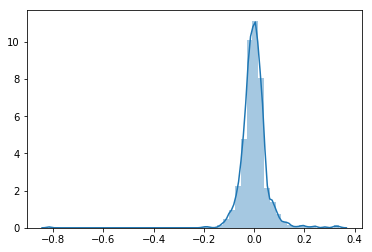

In [977]:
#PLotting
res = y_train - y_train_pred
sns.distplot(res)

In [978]:
# Scaling the test data
df_test[numeric_var] = scaler.transform(df_test[numeric_var])
# Separating the target variable
y_test = df_test.pop('SalePrice')
X_test = df_test

In [979]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [980]:
#Prediction
y_test_pred = lm.predict(X_test_new)

In [981]:
#Evaluate
r2_score(y_test,y_test_pred)

0.732631393635303

Text(0, 0.5, 'y_test_pred')

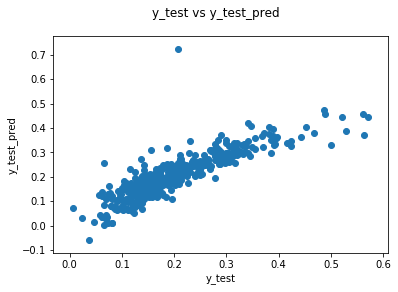

In [982]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred')           
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred')  

In [995]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.01, 1.0, 5.0, 10.0,100.0,1000.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [996]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.042376      0.003071         0.001600        0.000490      0.0001   
1       0.019925      0.013442         0.002799        0.003917       0.001   
2       0.009374      0.007654         0.000000        0.000000        0.01   
3       0.009522      0.005300         0.003273        0.003633           1   
4       0.014392      0.005813         0.002599        0.000490           5   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.883160           0.616078           0.890381   
1   {'alpha': 0.001}           0.827800           0.723673           0.832854   
2    {'alpha': 0.01}           0.404448           0.384859           0.443492   
3     {'alpha': 1.0}          -0.002075          -0.002248          -0.001591   
4     {'alpha': 5.0}          -0.002075          -0.002248          -0.001591   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.725755       ...                0.798546        0.110049   
1           0.817332       ...                0.809398        0.043897   
2           0.329575       ...                0.395127        0.037801   
3          -0.004583       ...               -0.002181        0.001361   
4          -0.004583       ...               -0.002181        0.001361   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.914539            0.940219   
1                1            0.843824            0.873926   
2                3            0.409055            0.400762   
3                4            0.000000            0.000000   
4                4            0.000000            0.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.916096            0.922228            0.918945   
1            0.838574            0.840343            0.838442   
2            0.397971            0.419307            0.382750   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0          0.922405         0.009285  
1          0.847022         0.013591  
2          0.401969         0.012146  
3          0.000000         0.000000  
4          0.000000         0.000000  

[5 rows x 21 columns]

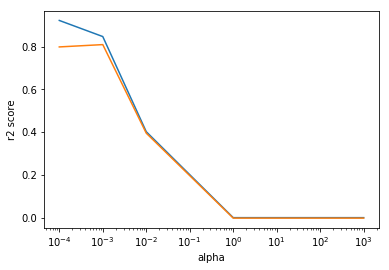

In [997]:
# plotting the value of alpha and r2 score to get the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [998]:
# model with optimal alpha
# lasso regression
lmlasso = Lasso(alpha=.001)
lmlasso.fit(X_train, y_train)

# predict
y_train_pred = lmlasso.predict(X_train)
print(skl.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmlasso.predict(X_test)
print(skl.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8413646557867576
0.8154100510401681


In [1000]:
# lasso model parameters
model_parameters = list(lmlasso.coef_)
model_parameters.insert(0, lmlasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.062),
 ('MSSubClass', -0.026),
 ('LotArea', 0.0),
 ('OverallQual', 0.175),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.016),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.205),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.014),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.039),
 ('Fireplaces', 0.03),
 ('GarageCars', 0.057),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.006),
 ('MSZoning_RM', -0.003),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.006),
 ('LandContour

In [1001]:
#Now using ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1002]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012393      0.001853         0.001599        0.000490      0.0001   
1       0.011394      0.002726         0.002200        0.000983       0.001   
2       0.012194      0.001937         0.001599        0.000490        0.01   
3       0.009595      0.001018         0.001399        0.000489        0.05   
4       0.006597      0.003321         0.000999        0.000631         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.030642          -0.024999          -0.028757   
1   {'alpha': 0.001}          -0.030612          -0.024957          -0.028700   
2    {'alpha': 0.01}          -0.030376          -0.024721          -0.028362   
3    {'alpha': 0.05}          -0.029790          -0.024736          -0.028138   
4     {'alpha': 0.1}          -0.029389          -0.025097          -0.028185   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.030548       ...               -0.028804        0.002051   
1          -0.030337       ...               -0.028721        0.002024   
2          -0.028690       ...               -0.028154        0.001861   
3          -0.026604       ...               -0.027607        0.001771   
4          -0.026521       ...               -0.027595        0.001575   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.017101           -0.017338   
1               23           -0.017101           -0.017334   
2               22           -0.017102           -0.017380   
3               18           -0.017140           -0.018086   
4               17           -0.017180           -0.018844   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.016921           -0.018313           -0.016586   
1           -0.016912           -0.018303           -0.016586   
2           -0.016953           -0.018300           -0.016702   
3           -0.017690           -0.018861           -0.017660   
4           -0.018458           -0.019551           -0.018527   

   mean_train_score  std_train_score  
0         -0.017252         0.000585  
1         -0.017247         0.000582  
2         -0.017287         0.000552  
3         -0.017887         0.000572  
4         -0.018512         0.000770  

[5 rows x 21 columns]

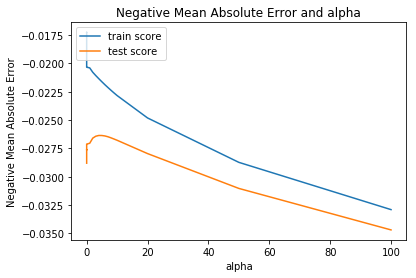

In [1003]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1004]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.48239058e-02,  2.05090951e-02,  7.96282365e-02,  3.37402737e-02,
        6.00351991e-03,  1.43608166e-02,  3.88735186e-02,  2.12813892e-02,
        3.17789682e-03,  1.61503718e-02,  2.59354175e-02,  4.77533516e-02,
        6.73147686e-02,  6.45555855e-03,  6.64566361e-02,  2.66708588e-02,
        4.09649703e-03,  4.70425187e-02,  1.65232388e-02, -5.53759561e-03,
       -1.69996521e-02,  5.08281532e-02,  2.95736795e-02,  4.74828509e-02,
        1.98468653e-02,  1.95575970e-02,  6.50938211e-03,  5.02889075e-03,
        2.86050407e-03,  1.92374534e-02,  1.17395085e-02, -4.16481314e-03,
       -5.66598769e-03, -3.75060690e-03,  7.19762799e-03,  1.40695112e-03,
        1.15425145e-02,  5.33640871e-03,  1.37553364e-02,  1.59437987e-02,
       -2.01904284e-02, -2.76646796e-03,  1.77797890e-02,  3.04556712e-03,
        9.62093302e-03, -6.30762755e-03,  1.87198302e-02, -1.28441884e-02,
       -5.88861048e-03,  4.27518222e-04,  5.44792441e-03,  1.50942485e-02,
       -1.42370107e-03, -